## Let's walk through a k-Nearest Neighbors Classifier and find the best value for k.  

In [0]:
# import some libraries.  I don't think we'll need all these, but it doesn't hurt to have them ready. 
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 



In [0]:
# load the data
digits = datasets.load_digits()

In [3]:
# look at the keys
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [4]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)


(1797, 8, 8)
(1797, 64)


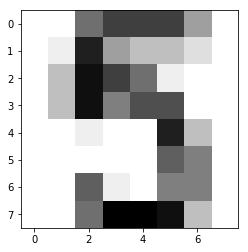

In [5]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')


In [0]:
# Create feature and target arrays
X = digits.data
y = digits.target


### Let's split the data into testing and training sets.  Kaggle already does the splitting for us, but it is good to know how to do this on our own in the real world.  

In [0]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


### Fit the Knn classifier with 7 neighbors.  You can chose another number here.  

### We'll go through some steps below to determine which number might work best for this data.  For now we will use 7 to see what happens.  

In [0]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)


In [9]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [10]:
# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


### Not bad! 98 percent.  

In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


## Finding a good k value

### Let's now compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you can develop an intuition for overfitting and underfitting a model.

#### Let's now streamline some of the steps we did above into a for loop. 

In [0]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)



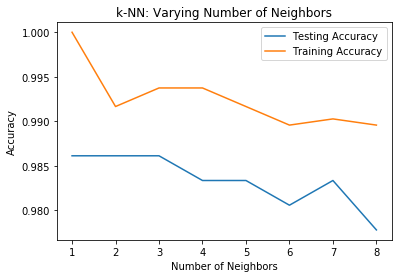

In [13]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


As we can see from the plot, it appears like the test accuracy is highest when using 3 and 5 neighbors.  7 isn't too bad, but using 8 neighbors or more seems to result in a simple model that under fits the data. 